<a href="https://colab.research.google.com/github/Shubhansh-03/DSC/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
#Loading the MNIST Fashion dataset from Tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
#All Pixel values are from 0-255, so converting them into 0-1, Also acts as normalization
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
                              #Using Glorot and He initialization, and Relu
                              #activation function relu because tanh didn't help

#t.keras.Dropout(rate=0.2), Tried adding dropout, didn't increase accuracy
tf.keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
#t.keras.Dropout(rate=0.2),
tf.keras.layers.Dense(10, activation="softmax") #Since there are 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Creating a custom callback to store all the metrics for the test data
class Metrics_callback(tf.keras.callbacks.Callback):
    def __init__(self, X_test, y_test):
        self.x_test = X_test
        self.y_test = y_test
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs=None):
        # y_pred = self.model.predict(self.x_test)
        a, b = model.evaluate(self.x_test, self.y_test)
        self.loss.append(a)
        self.acc.append(b)

In [ ]:
#Using early stopping with restore_best_weights to get best validation data metrics
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3
                                                  , restore_best_weights=True)
optimizer = tf.keras.optimizers.SGD(learning_rate = 3e-2, momentum=0.9
                                    #, nesterov = True (Did not help in increasing accuracy)
                                    )

model.compile(loss="sparse_categorical_crossentropy",
optimizer=optimizer,
metrics=["accuracy"])

In [ ]:
metrics_callback = Metrics_callback(X_test, y_test)

history = model.fit(X_train, y_train, epochs=25,
validation_data=(X_valid, y_valid), callbacks = [early_stopping, metrics_callback])

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.3748
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8698 - loss: 0.3529 - val_accuracy: 0.8704 - val_loss: 0.3548
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8659 - loss: 0.3624
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8760 - loss: 0.3281 - val_accuracy: 0.8726 - val_loss: 0.3483
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3844
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8817 - loss: 0.3178 - val_accuracy: 0.8598 - val_loss: 0.3767
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3881
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8890 - loss: 0.2939 - val_accuracy: 0.8726 - val_loss: 0.3605
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.3800
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8963 - loss: 0.2827 - val_accuracy: 0

In [ ]:
loss_train  = history.history['loss']
loss_valid  = history.history['val_loss']
acc_train = history.history['accuracy']
acc_valid = history.history['val_accuracy']

In [ ]:
loss_test = metrics_callback.loss
acc_test = metrics_callback.acc

In [ ]:
acc_train

[0.868363618850708,
 0.8758909106254578,
 0.8828545212745667,
 0.8874363899230957,
 0.8934363722801208]

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
pred_label = [np.argmax(i) for i in y_pred]

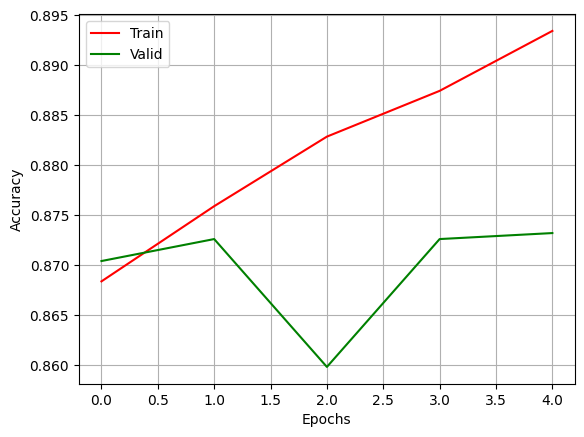

In [ ]:
epoch = [i for i in history.epoch]
plt.plot(epoch, acc_train[0:], color = 'red')
# plt.plot(epoch, loss_test[1:], color = 'blue')
plt.plot(epoch, acc_valid[0:], color = 'green')
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Valid"])
plt.grid(True)
plt.show()

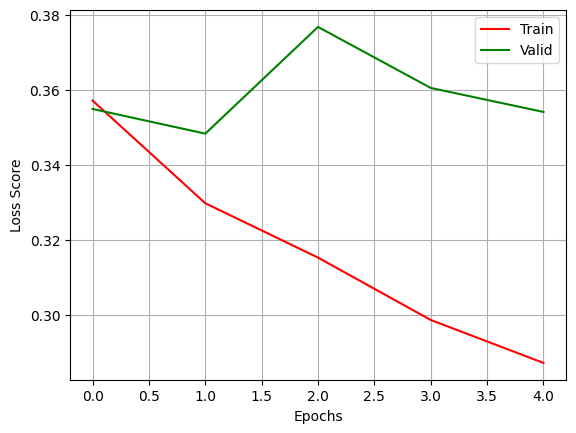

In [ ]:
epoch = [i for i in history.epoch]
plt.plot(epoch, loss_train[0:], color = 'red')
# plt.plot(epoch, loss_test[1:], color = 'blue')
plt.plot(epoch, loss_valid[0:], color = 'green')
plt.ylabel("Loss Score")
plt.xlabel("Epochs")
plt.legend(["Train", "Valid"])
plt.grid(True)
plt.show()

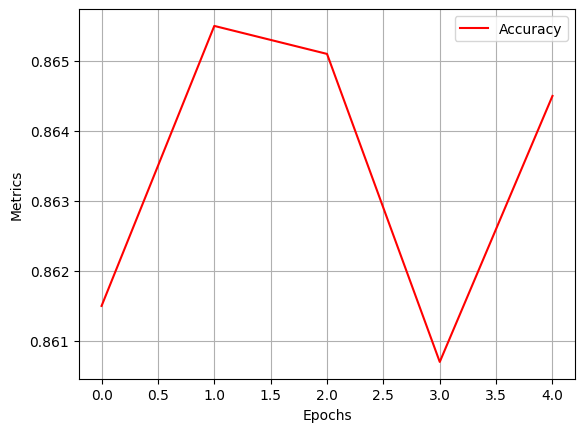

In [ ]:
epoch = [i for i in history.epoch]
plt.plot(epoch, acc_test[0:], color = 'red')
# plt.plot(epoch, loss_test[1:], color = 'blue')
# plt.plot(epoch, loss_test[0:], color = 'green')
plt.ylabel("Metrics")
plt.xlabel("Epochs")
plt.legend(["Accuracy", "Loss"])
plt.grid(True)
plt.show()

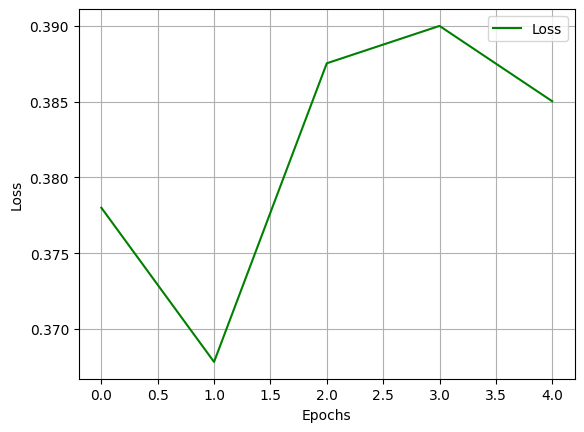

In [ ]:
epoch = [i for i in history.epoch]
# plt.plot(epoch, acc_test[0:], color = 'red')
# plt.plot(epoch, loss_test[1:], color = 'blue')
plt.plot(epoch, loss_test[0:], color = 'green')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss"])
plt.grid(True)
plt.show()

In [ ]:
n_classes = 10

In [ ]:
correctly_classified = []
incorrectly_classified = []
index = 0
for actual, predict in zip(y_test, pred_label):
    if actual == predict:
        correctly_classified.append(index)
    else:
        incorrectly_classified.append(index)
    index += 1

ccc = len(correctly_classified)
icc = len(incorrectly_classified)

In [ ]:
label_map = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

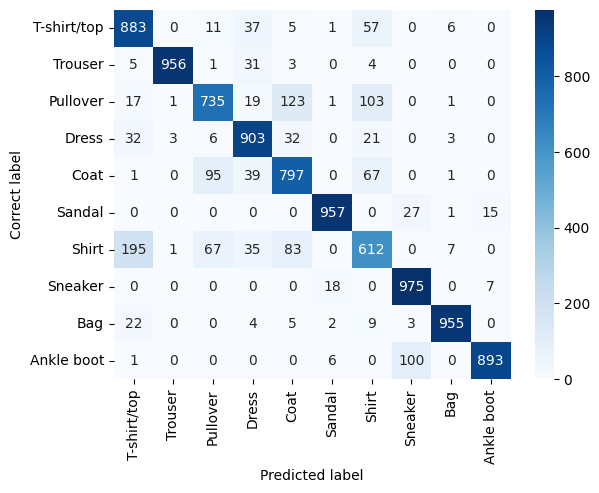

In [ ]:
conf_matrix = confusion_matrix(y_test, pred_label)

ax = sns.heatmap(conf_matrix,
            cmap='Blues',
            xticklabels=label_map,
            yticklabels=label_map,
            annot=True,
            fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('Correct label')

plt.show()

**CNN MODEL**

In [ ]:
#Tried making a CNN model, (was taking too much time to train for me to fine-tune it)
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=(3, 3), padding="same",
activation="relu", kernel_initializer="he_normal")


In [ ]:
model1 = tf.keras.Sequential([
DefaultConv2D(filters=32, kernel_size=(3, 3), input_shape=[28, 28, 1], strides=1),
tf.keras.layers.BatchNormalization(),

DefaultConv2D(filters=32),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(rate=0.3),

DefaultConv2D(filters=64),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Dropout(rate=0.3),

DefaultConv2D(filters=128),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(rate=0.3),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(units=512, activation="relu",
                      kernel_initializer="he_normal"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(units=64, activation="relu",
                      kernel_initializer="he_normal"),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(units=10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate = 2e-2,
                                    )

model1.compile(loss="sparse_categorical_crossentropy",
optimizer=optimizer1,
metrics=["accuracy"])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs = 3, batch_size = 128,
                    validation_data = (X_valid, y_valid))

Epoch 1/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8372 - loss: 0.4523 - val_accuracy: 0.8850 - val_loss: 0.3153
Epoch 2/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8515 - loss: 0.4242 - val_accuracy: 0.8826 - val_loss: 0.3237
Epoch 3/3
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8584 - loss: 0.4012 - val_accuracy: 0.8894 - val_loss: 0.2938
